# Customer Segmentation Analysis

## Objective
Cluster customers into segments based on income and spending score using unsupervised learning techniques.

## Dataset
Mall Customer Segmentation Data from Kaggle

## Topics Covered
- Clustering
- Unsupervised Learning
- K-Means & DBSCAN

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

## 2. Load and Explore the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
df.head(10)

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Dataset info
print("Dataset Info:")
print("="*50)
df.info()
print("\n")
print("Missing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Gender distribution
print("Gender Distribution:")
print(df['Gender'].value_counts())

Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


## 3. Visual Exploration of Data

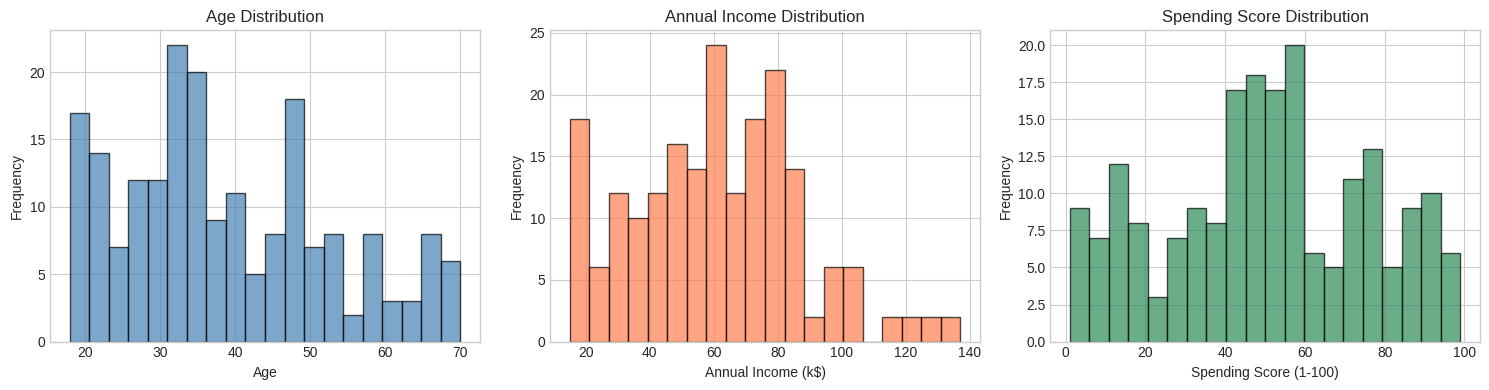

In [7]:
# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age distribution
axes[0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution')

# Annual Income distribution
axes[1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Annual Income Distribution')

# Spending Score distribution
axes[2].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='seagreen')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

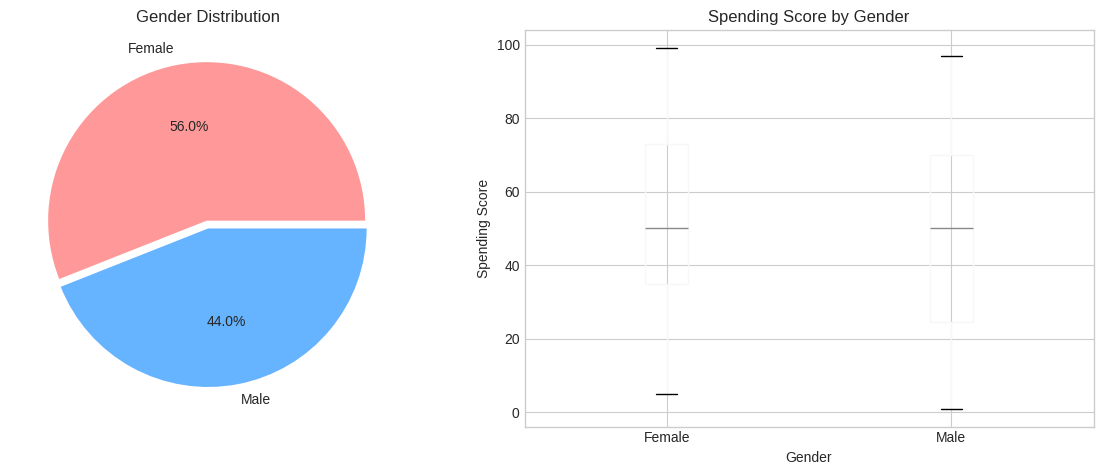

In [8]:
# Gender distribution pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
gender_counts = df['Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            colors=['#ff9999', '#66b3ff'], explode=(0.05, 0))
axes[0].set_title('Gender Distribution')

# Box plot by gender
df.boxplot(column='Spending Score (1-100)', by='Gender', ax=axes[1])
axes[1].set_title('Spending Score by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Spending Score')
plt.suptitle('')

plt.tight_layout()
plt.show()

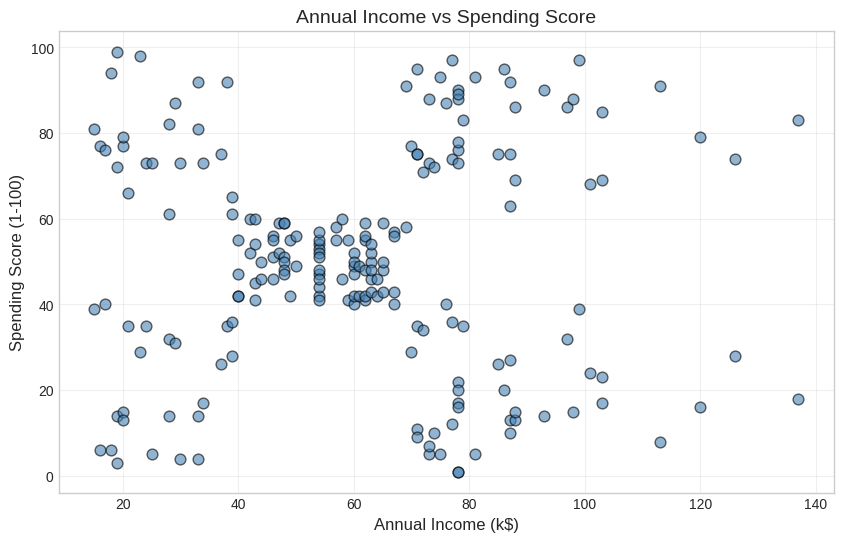

In [9]:
# Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c='steelblue', alpha=0.6, edgecolors='black', s=60)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Annual Income vs Spending Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

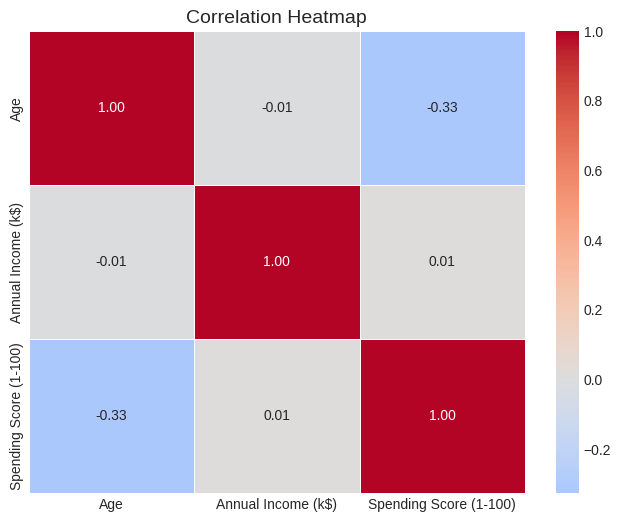

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

## 4. Data Preprocessing and Scaling

In [11]:
# Select features for clustering (Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("Features shape:", X.shape)
print("\nFeatures before scaling:")
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']).describe())

Features shape: (200, 2)

Features before scaling:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


In [12]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features after scaling:")
print(pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)']).describe())

Features after scaling:
       Annual Income (scaled)  Spending Score (scaled)
count            2.000000e+02             2.000000e+02
mean            -2.131628e-16            -1.465494e-16
std              1.002509e+00             1.002509e+00
min             -1.738999e+00            -1.910021e+00
25%             -7.275093e-01            -5.997931e-01
50%              3.587926e-02            -7.764312e-03
75%              6.656748e-01             8.851316e-01
max              2.917671e+00             1.894492e+00


## 5. K-Means Clustering - Finding Optimal Number of Clusters

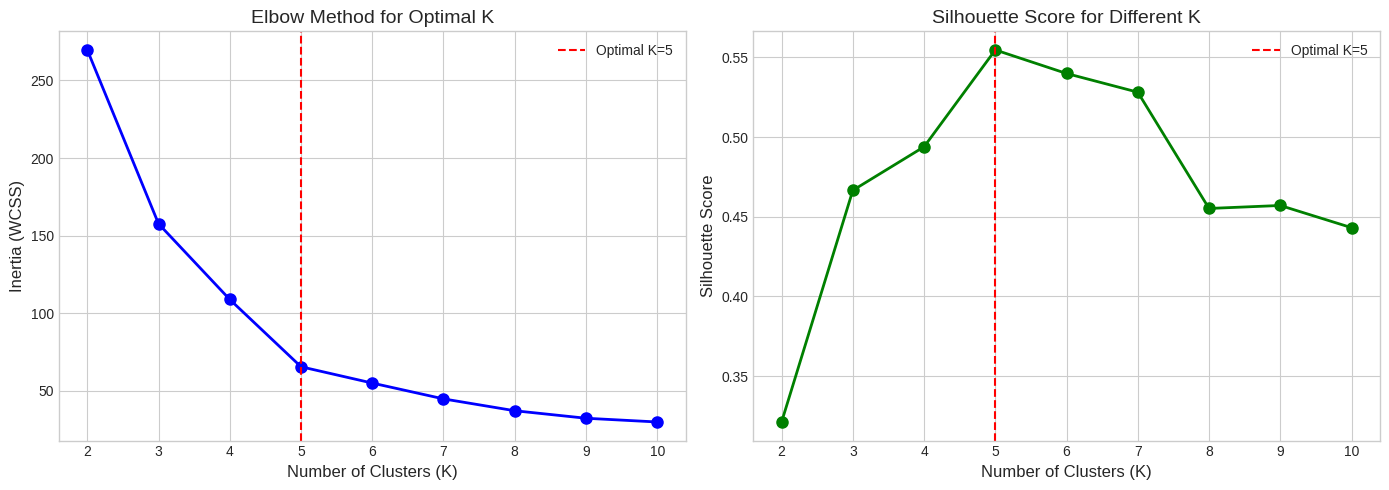


Silhouette Scores for each K:
K=2: 0.3213
K=3: 0.4666
K=4: 0.4939
K=5: 0.5547
K=6: 0.5399
K=7: 0.5281
K=8: 0.4552
K=9: 0.4571
K=10: 0.4432


In [13]:
# Elbow Method - Finding optimal K
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14)
axes[0].axvline(x=5, color='r', linestyle='--', label='Optimal K=5')
axes[0].legend()

# Silhouette Score plot
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different K', fontsize=14)
axes[1].axvline(x=5, color='r', linestyle='--', label='Optimal K=5')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nSilhouette Scores for each K:")
for k, score in zip(K_range, silhouette_scores):
    print(f"K={k}: {score:.4f}")

## 6. Apply K-Means with Optimal Clusters (K=5)

In [14]:
# Apply K-Means with K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Get cluster centers (in original scale)
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

print("Cluster Centers (Original Scale):")
centers_df = pd.DataFrame(centers_original, 
                          columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers_df.index.name = 'Cluster'
print(centers_df)

print(f"\nSilhouette Score: {silhouette_score(X_scaled, df['KMeans_Cluster']):.4f}")

Cluster Centers (Original Scale):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Silhouette Score: 0.5547


In [15]:
# Cluster distribution
print("Customers per Cluster:")
print(df['KMeans_Cluster'].value_counts().sort_index())

Customers per Cluster:
KMeans_Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


## 7. Visualize K-Means Clusters

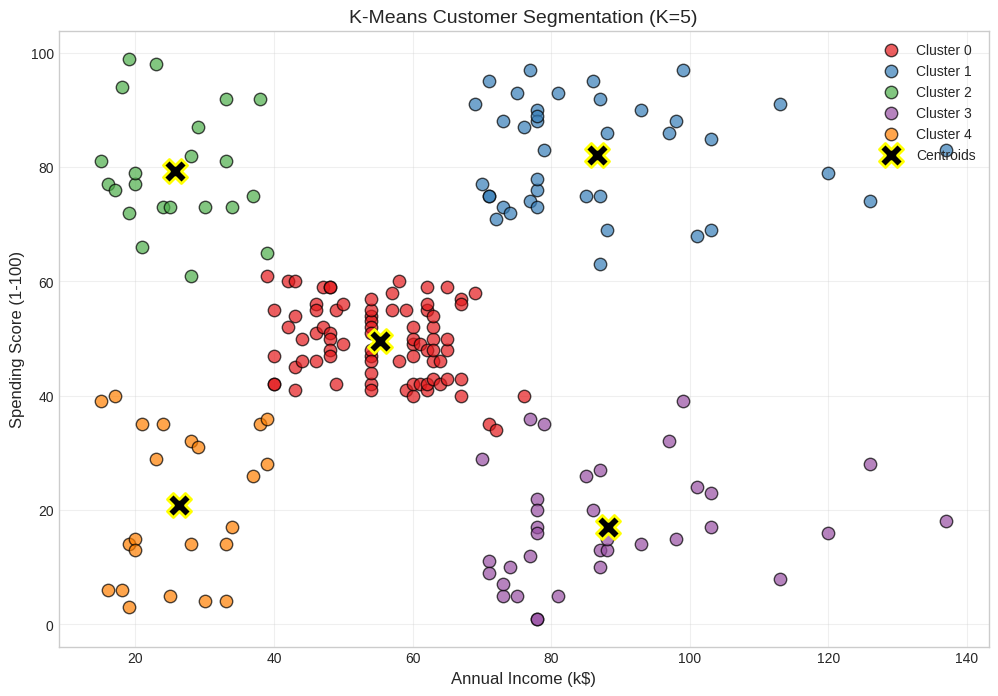

In [16]:
# 2D Cluster Visualization
plt.figure(figsize=(12, 8))

# Define colors for clusters
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

for i in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'],
                c=colors[i], label=cluster_names[i], 
                s=80, alpha=0.7, edgecolors='black')

# Plot cluster centers
plt.scatter(centers_original[:, 0], centers_original[:, 1], 
            c='black', marker='X', s=300, label='Centroids', 
            edgecolors='yellow', linewidths=2)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Customer Segmentation (K=5)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

## 8. Cluster Analysis and Interpretation

In [17]:
# Detailed cluster analysis
cluster_analysis = df.groupby('KMeans_Cluster').agg({
    'CustomerID': 'count',
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
}).round(2)

cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]
cluster_analysis = cluster_analysis.rename(columns={'CustomerID_count': 'Customer_Count'})

print("Cluster Analysis Summary:")
cluster_analysis

Cluster Analysis Summary:


,Customer_Count,Age_mean,Age_min,Age_max,Annual Income (k$)_mean,Annual Income (k$)_min,Annual Income (k$)_max,Spending Score (1-100)_mean,Spending Score (1-100)_min,Spending Score (1-100)_max
KMeans_Cluster,,,,,,,,,,
0,81,42.72,18,70,55.30,39,76,49.52,34,61
1,39,32.69,27,40,86.54,69,137,82.13,63,97
2,22,25.27,18,35,25.73,15,39,79.36,61,99
3,35,41.11,19,59,88.20,70,137,17.11,1,39
4,23,45.22,19,67,26.30,15,39,20.91,3,40


In [18]:
# Average spending per cluster (Bonus)
print("\n=== Average Spending Score per Cluster ===")
avg_spending = df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean().round(2)
avg_income = df.groupby('KMeans_Cluster')['Annual Income (k$)'].mean().round(2)

cluster_summary = pd.DataFrame({
    'Avg Annual Income (k$)': avg_income,
    'Avg Spending Score': avg_spending,
    'Customer Count': df.groupby('KMeans_Cluster')['CustomerID'].count()
})

# Add cluster labels based on characteristics
def label_cluster(row):
    if row['Avg Annual Income (k$)'] > 70 and row['Avg Spending Score'] > 70:
        return 'High Income, High Spenders'
    elif row['Avg Annual Income (k$)'] > 70 and row['Avg Spending Score'] < 30:
        return 'High Income, Low Spenders'
    elif row['Avg Annual Income (k$)'] < 40 and row['Avg Spending Score'] > 60:
        return 'Low Income, High Spenders'
    elif row['Avg Annual Income (k$)'] < 40 and row['Avg Spending Score'] < 30:
        return 'Low Income, Low Spenders'
    else:
        return 'Average Income, Average Spenders'

cluster_summary['Segment Label'] = cluster_summary.apply(label_cluster, axis=1)
cluster_summary


=== Average Spending Score per Cluster ===


,Avg Annual Income (k$),Avg Spending Score,Customer Count,Segment Label
KMeans_Cluster,,,,
0,55.30,49.52,81,"Average Income, Average Spenders"
1,86.54,82.13,39,"High Income, High Spenders"
2,25.73,79.36,22,"Low Income, High Spenders"
3,88.20,17.11,35,"High Income, Low Spenders"
4,26.30,20.91,23,"Low Income, Low Spenders"


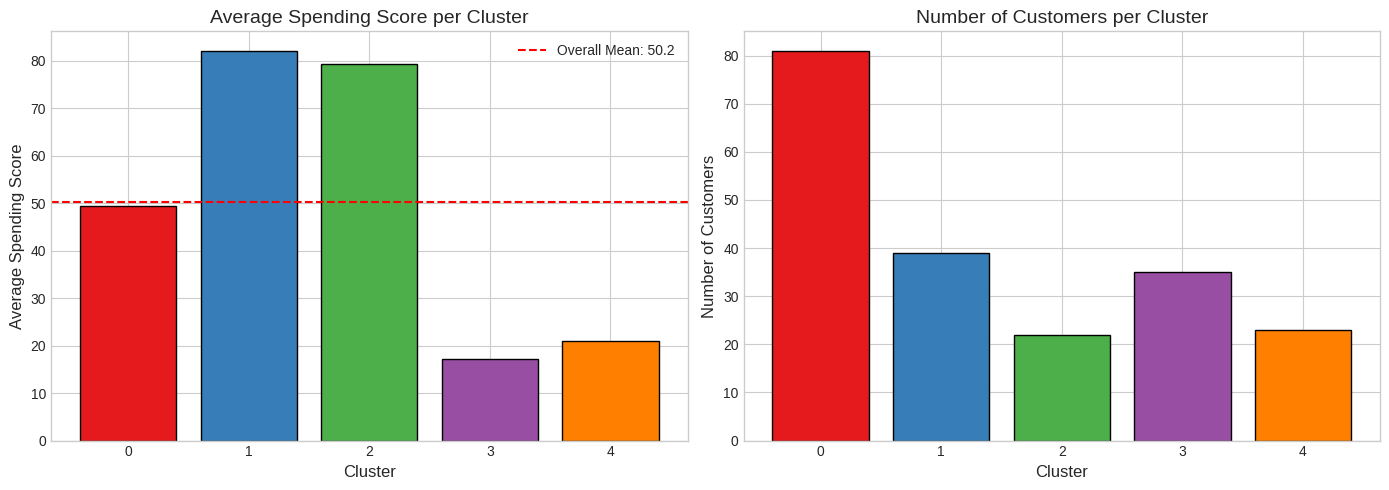

In [19]:
# Visualize average spending per cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot - Average Spending Score
axes[0].bar(cluster_summary.index, cluster_summary['Avg Spending Score'], 
            color=colors, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Average Spending Score', fontsize=12)
axes[0].set_title('Average Spending Score per Cluster', fontsize=14)
axes[0].axhline(y=df['Spending Score (1-100)'].mean(), color='red', 
                linestyle='--', label=f'Overall Mean: {df["Spending Score (1-100)"].mean():.1f}')
axes[0].legend()

# Bar plot - Customer Count
axes[1].bar(cluster_summary.index, cluster_summary['Customer Count'], 
            color=colors, edgecolor='black')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Number of Customers per Cluster', fontsize=14)

plt.tight_layout()
plt.show()

## 9. BONUS: DBSCAN Clustering

In [20]:
# Apply DBSCAN
# eps: maximum distance between two samples
# min_samples: minimum number of samples in a neighborhood

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print(f"DBSCAN Results:")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster distribution:")
print(df['DBSCAN_Cluster'].value_counts().sort_index())

DBSCAN Results:
Number of clusters: 2
Number of noise points: 8

Cluster distribution:
DBSCAN_Cluster
-1      8
 0    157
 1     35
Name: count, dtype: int64


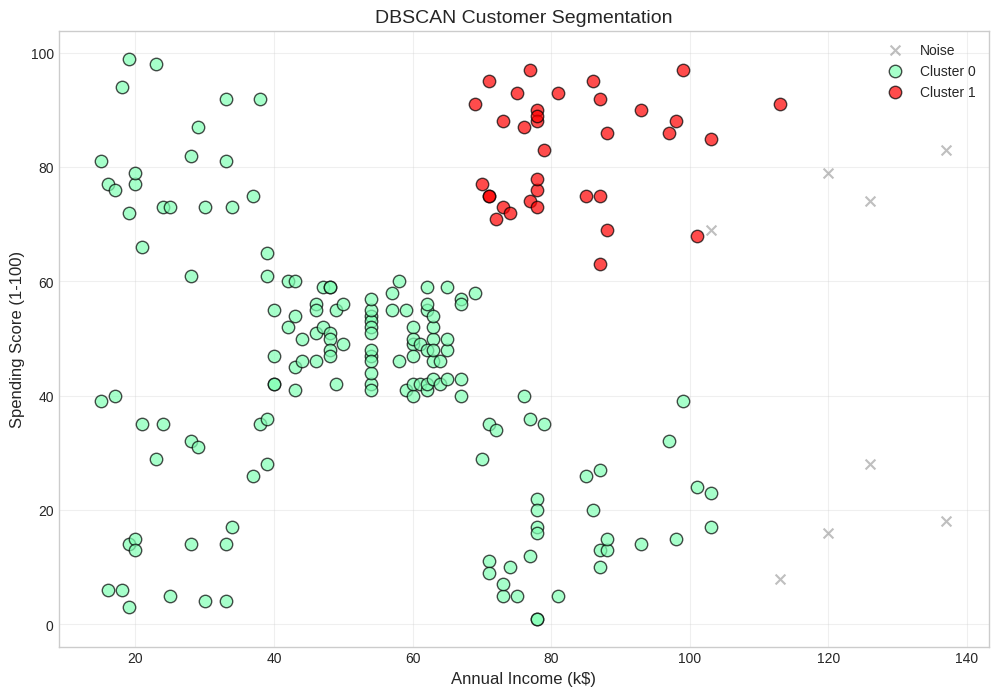

In [21]:
# Visualize DBSCAN clusters
plt.figure(figsize=(12, 8))

unique_labels = sorted(df['DBSCAN_Cluster'].unique())
colors_dbscan = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors_dbscan):
    if label == -1:
        # Noise points
        cluster_data = df[df['DBSCAN_Cluster'] == label]
        plt.scatter(cluster_data['Annual Income (k$)'], 
                    cluster_data['Spending Score (1-100)'],
                    c='gray', label='Noise', s=50, alpha=0.5, marker='x')
    else:
        cluster_data = df[df['DBSCAN_Cluster'] == label]
        plt.scatter(cluster_data['Annual Income (k$)'], 
                    cluster_data['Spending Score (1-100)'],
                    c=[color], label=f'Cluster {label}', 
                    s=80, alpha=0.7, edgecolors='black')

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('DBSCAN Customer Segmentation', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

In [22]:
# Try different DBSCAN parameters
print("Experimenting with different DBSCAN parameters:")
print("="*50)

eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 7]

results = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_temp.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })

pd.DataFrame(results)

Experimenting with different DBSCAN parameters:


,eps,min_samples,n_clusters,n_noise
0,0.3,3,9,14
1,0.3,5,7,35
2,0.3,7,4,72
3,0.4,3,4,10
4,0.4,5,4,15
5,0.4,7,4,20
6,0.5,3,2,7
7,0.5,5,2,8
8,0.5,7,2,12
9,0.6,3,1,0


## 10. Comparison: K-Means vs DBSCAN

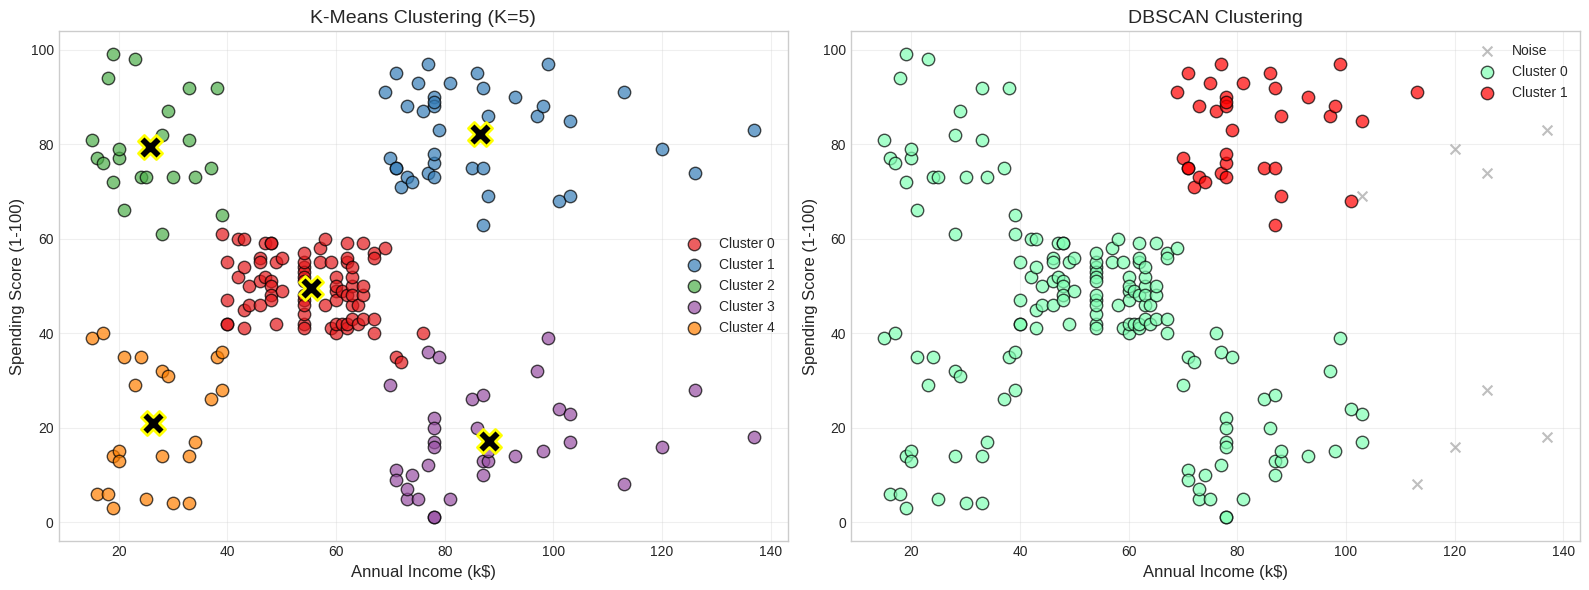

In [23]:
# Side by side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means plot
for i in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == i]
    axes[0].scatter(cluster_data['Annual Income (k$)'], 
                    cluster_data['Spending Score (1-100)'],
                    c=colors[i], label=f'Cluster {i}', 
                    s=80, alpha=0.7, edgecolors='black')
axes[0].scatter(centers_original[:, 0], centers_original[:, 1], 
                c='black', marker='X', s=300, edgecolors='yellow', linewidths=2)
axes[0].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[0].set_title('K-Means Clustering (K=5)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# DBSCAN plot
for label, color in zip(unique_labels, colors_dbscan):
    if label == -1:
        cluster_data = df[df['DBSCAN_Cluster'] == label]
        axes[1].scatter(cluster_data['Annual Income (k$)'], 
                        cluster_data['Spending Score (1-100)'],
                        c='gray', label='Noise', s=50, alpha=0.5, marker='x')
    else:
        cluster_data = df[df['DBSCAN_Cluster'] == label]
        axes[1].scatter(cluster_data['Annual Income (k$)'], 
                        cluster_data['Spending Score (1-100)'],
                        c=[color], label=f'Cluster {label}', 
                        s=80, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12)
axes[1].set_title('DBSCAN Clustering', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Conclusions

In [24]:
print("="*60)
print("CUSTOMER SEGMENTATION ANALYSIS - SUMMARY")
print("="*60)

print("\n📊 DATASET OVERVIEW:")
print(f"   - Total Customers: {len(df)}")
print(f"   - Features Used: Annual Income, Spending Score")

print("\n🎯 K-MEANS CLUSTERING RESULTS (Optimal K=5):")
for idx, row in cluster_summary.iterrows():
    print(f"\n   Cluster {idx}: {row['Segment Label']}")
    print(f"      - Customers: {row['Customer Count']}")
    print(f"      - Avg Income: ${row['Avg Annual Income (k$)']}k")
    print(f"      - Avg Spending Score: {row['Avg Spending Score']}")

print("\n📈 BUSINESS INSIGHTS:")
print("   1. High Income, High Spenders - Target for premium products/loyalty programs")
print("   2. High Income, Low Spenders - Potential for upselling, need engagement")
print("   3. Low Income, High Spenders - Offer budget-friendly options, installments")
print("   4. Low Income, Low Spenders - Focus on value deals and discounts")
print("   5. Average segment - General marketing campaigns")

print("\n🔬 DBSCAN vs K-MEANS:")
print(f"   - K-Means: 5 clearly defined clusters")
print(f"   - DBSCAN: {n_clusters_dbscan} clusters + {n_noise} noise points")
print("   - K-Means is better suited for this dataset due to spherical cluster shapes")

print("\n" + "="*60)

CUSTOMER SEGMENTATION ANALYSIS - SUMMARY

📊 DATASET OVERVIEW:
   - Total Customers: 200
   - Features Used: Annual Income, Spending Score

🎯 K-MEANS CLUSTERING RESULTS (Optimal K=5):

   Cluster 0: Average Income, Average Spenders
      - Customers: 81
      - Avg Income: $55.3k
      - Avg Spending Score: 49.52

   Cluster 1: High Income, High Spenders
      - Customers: 39
      - Avg Income: $86.54k
      - Avg Spending Score: 82.13

   Cluster 2: Low Income, High Spenders
      - Customers: 22
      - Avg Income: $25.73k
      - Avg Spending Score: 79.36

   Cluster 3: High Income, Low Spenders
      - Customers: 35
      - Avg Income: $88.2k
      - Avg Spending Score: 17.11

   Cluster 4: Low Income, Low Spenders
      - Customers: 23
      - Avg Income: $26.3k
      - Avg Spending Score: 20.91

📈 BUSINESS INSIGHTS:
   1. High Income, High Spenders - Target for premium products/loyalty programs
   2. High Income, Low Spenders - Potential for upselling, need engagement
   3. Low I